# Main Title

Intro ...

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

...

In [2]:
pp_may_24_url = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update-new-version.csv'
pp_23 = 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2023.csv'

pp_may_24 = pd.read_csv(pp_may_24_url, header=None)

In [3]:
pp_cols = ['id', 'price', 'date', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'district', 'county',
           'ppd_category_type', 'record_status']
pp_may_24.columns = pp_cols

pp_may_24['date'] = pd.to_datetime(pp_may_24['date'])

# str_cols = ['paon', 'saon', 'street', 'locality', 'town', 'district', 'county']
# for str_col in str_cols:
#   pp_may_24[str_col] = pp_may_24[str_col].astype(str)

...

In [4]:
def print_df_summary(df):
  print("Shape:")
  display(df.shape)

  total_nas = df.isna().sum().sum()
  rows_nas  = df.isnull().any(axis=1).sum()
  cols_nas  = df.isnull().any().sum()
  print('\nTotal NAs:', total_nas)
  print('Rows with NAs:', rows_nas)
  print('Cols with NAs:', cols_nas)

  print("\nInfo:")
  display(df.info())

  print("\nSummary stats:")
  display(df.describe())

  print("\nRaw data:")
  display(df)
  print("\n")


print_df_summary(pp_may_24)


for grp in ['type', 'new', 'duration', 'ppd_category_type', 'record_status']:
  print('\n')
  display(pp_may_24[[grp, 'price']].groupby(grp).describe())


print('\n\nNaNs:')
pp_may_24.isnull().sum()

Shape:


(78452, 16)


Total NAs: 115542
Rows with NAs: 76402
Cols with NAs: 4

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78452 entries, 0 to 78451
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 78452 non-null  object        
 1   price              78452 non-null  int64         
 2   date               78452 non-null  datetime64[ns]
 3   postcode           78176 non-null  object        
 4   type               78452 non-null  object        
 5   new                78452 non-null  object        
 6   duration           78452 non-null  object        
 7   paon               78452 non-null  object        
 8   saon               12521 non-null  object        
 9   street             77217 non-null  object        
 10  locality           30352 non-null  object        
 11  town               78452 non-null  object        
 12  district           78452 non-null  object        
 1

None


Summary stats:


,price,date
count,7.845200e+04,78452
mean,4.357407e+05,2023-06-04 22:15:07.112629248
min,1.000000e+02,1995-01-06 00:00:00
25%,1.760000e+05,2023-03-31 00:00:00
50%,2.750000e+05,2024-01-16 00:00:00
75%,4.180000e+05,2024-04-12 00:00:00
max,9.000000e+08,2024-05-31 00:00:00
std,4.601969e+06,NaN



Raw data:


,id,price,date,postcode,type,new,duration,paon,saon,street,locality,town,district,county,ppd_category_type,record_status
0,{1A0C5C63-265E-7CBE-E063-4804A8C06C96},249955,2021-06-24,CF72 9WU,D,N,F,36,NaN,BLACKTHORN COURT,LLANHARRY,PONTYCLUN,RHONDDA CYNON TAFF,RHONDDA CYNON TAFF,A,A
1,{1A0C5C63-26CF-7CBE-E063-4804A8C06C96},365000,2021-08-31,LL67 0LT,D,N,F,12,NaN,MAES CAPEL,NaN,CEMAES BAY,ISLE OF ANGLESEY,ISLE OF ANGLESEY,A,A
2,{1A0C5C63-270D-7CBE-E063-4804A8C06C96},202000,2021-09-30,SA4 6PW,T,N,F,31,NaN,HEOL CAE TYNEWYDD,LOUGHOR,SWANSEA,SWANSEA,SWANSEA,A,A
3,{1A0C5C63-2789-7CBE-E063-4804A8C06C96},300000,2021-06-30,SA11 3EU,D,N,F,14,NaN,DAVIES ANDREWS ROAD,TONNA,NEATH,NEATH PORT TALBOT,NEATH PORT TALBOT,A,A
4,{1A0C5C63-27A6-7CBE-E063-4804A8C06C96},115000,2021-08-11,NP10 8BL,T,N,F,12,NaN,SKYE GROVE,DUFFRYN,NEWPORT,NEWPORT,NEWPORT,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78447,{1061746E-A86B-3C34-E063-4804A8C0F9E7},55462,2024-01-19,SN13 0QU,T,N,L,52,NaN,STONE CLOSE,NaN,CORSHAM,WILTSHIRE,WILTSHIRE,A,D
78448,{1061746E-6EA8-3C34-E063-4804A8C0F9E7},295000,2024-01-02,BS23 4JL,F,N,L,25,FLAT 2,FRENCHAY ROAD,NaN,WESTON-SUPER-MARE,NORTH SOMERSET,NORTH SOMERSET,A,D
78449,{1061746E-6EDD-3C34-E063-4804A8C0F9E7},290000,2024-01-12,TA6 7BZ,D,N,F,8,NaN,STAG VALLEY ROAD,NaN,BRIDGWATER,SOMERSET,SOMERSET,A,D
78450,{1061746E-8AB6-3C34-E063-4804A8C0F9E7},81735,2024-01-19,DH4 4QL,T,N,F,3,NaN,WOODHALL SPA,SHINEY ROW,HOUGHTON LE SPRING,SUNDERLAND,TYNE AND WEAR,A,D


price                                                            \
        count          mean           std      min        25%       50%   
type                                                                      
D     17572.0  4.877258e+05  5.764996e+05   2000.0  300875.25  400000.0   
F     16214.0  3.243198e+05  5.104410e+05   2500.0  147500.00  235000.0   
O      5392.0  1.537092e+06  1.523031e+07    100.0  115000.00  298100.0   
S     20003.0  3.007591e+05  2.245559e+05  20000.0  186150.00  255000.0   
T     19271.0  3.140368e+05  4.512705e+06    750.0  138000.00  215000.0   

                             
           75%          max  
type                         
D     550250.0   49872000.0  
F     370000.0   18000000.0  
O     745393.0  900000000.0  
S     355000.0   10350000.0  
T     325000.0  620000000.0

price                                                          \
       count           mean           std    min       25%       50%   
new                                                                    
N    64656.0  448297.488570  5.065828e+06  100.0  165339.5  260000.0   
Y    13796.0  376892.101044  3.966385e+05  999.0  239950.0  326000.0   

                            
          75%          max  
new                         
N    410000.0  900000000.0  
Y    435000.0   16930000.0

price                                                          \
            count           mean           std    min       25%       50%   
duration                                                                    
F         57834.0  460113.849812  5.019737e+06  100.0  194995.0  294995.0   
L         20618.0  367373.239742  3.145992e+06  100.0  140000.0  224175.0   

                                 
               75%          max  
duration                         
F         435000.0  900000000.0  
L         352000.0  414108660.0

price                                                \
                     count           mean           std    min       25%   
ppd_category_type                                                          
A                  63001.0  365273.105506  2.508848e+06  750.0  190000.0   
B                  15451.0  723070.023105  9.042562e+06  100.0  119000.0   

                                                    
                        50%       75%          max  
ppd_category_type                                   
A                  285000.0  422500.0  620000000.0  
B                  215596.0  385000.0  900000000.0

price                                                \
                 count           mean           std    min       25%   
record_status                                                          
A              71383.0  427539.129583  4.484793e+06  100.0  179995.5   
C               2151.0  873225.216179  1.013442e+07  500.0  132997.5   
D               4918.0  363438.942660  9.514494e+05  500.0  170000.0   

                                                
                    50%       75%          max  
record_status                                   
A              275000.0  419995.0  900000000.0  
C              247000.0  433500.0  414108660.0  
D              265500.0  400000.0   52000000.0



NaNs:


id                       0
price                    0
date                     0
postcode               276
type                     0
new                      0
duration                 0
paon                     0
saon                 65931
street                1235
locality             48100
town                     0
district                 0
county                   0
ppd_category_type        0
record_status            0
dtype: int64

...

In [5]:
pp_file = '/content/pp-complete.1.csv'

if not os.path.exists(pp_file):
  !apt-get install aria2
  !aria2c -x 16 -s 16 'http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-complete.csv' -o pp-complete.1.csv
else:
  print(f'{pp_file} already downloaded')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libaria2-0 libc-ares2
The following NEW packages will be installed:
  aria2 libaria2-0 libc-ares2
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 1,513 kB of archives.
After this operation, 5,441 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libc-ares2 amd64 1.18.1-1ubuntu0.22.04.3 [45.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libaria2-0 amd64 1.36.0-1 [1,086 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 aria2 amd64 1.36.0-1 [381 kB]
Fetched 1,513 kB in 2s (726 kB/s)
Selecting previously unselected package libc-ares2:amd64.
(Reading database ... 123586 files and directories currently installed.)
Preparing to unpack .../libc-ares2_1.18.1-1ubuntu0.22.04.3_amd64.deb ...
Unpacking libc-ares2:amd64 (1.18.1-1ubuntu

...

In [6]:
!pip install datatable

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 MB 23.7 MB/s eta 0:00:00


...

In [39]:
import datatable as dt
from datatable import (dt, f, by, ifelse, update, sort, join,
                       count, min, max, mean, sum, rowsum)


DT = dt.fread(pp_file)
pp_cols = ['id', 'price', 'date_str', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'district', 'county',
           'ppd_category_type', 'record_status']
DT.names = pp_cols

display(DT)
print('\n')
display(DT.stypes)

,id,price,date_str,postcode,type,new,duration,paon,saon,street,…,town,district,county,ppd_category_type,record_status
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,{109BBF80-1E51-4910-8E2C-B124E1117A7A},34950,1995-06-09 00:00,BA3 3AH,F,N,L,COOMBEND HOUSE,7,COOMBEND,…,RADSTOCK,WANSDYKE,AVON,A,A
1,{D5233D67-2975-426B-B98D-B124E39331D9},133000,1995-06-19 00:00,SW18 5AG,T,N,F,142,,ASTONVILLE STREET,…,LONDON,WANDSWORTH,GREATER LONDON,A,A
2,{718BD35C-25E1-431C-8AF7-B124E63ED4E1},83000,1995-08-21 00:00,IP11 7PU,D,N,F,3,,GARFIELD ROAD,…,FELIXSTOWE,SUFFOLK COASTAL,SUFFOLK,A,A
3,{E127F626-6247-4D95-A392-B124F4C0A558},59000,1995-07-27 00:00,PE21 0SF,D,Y,F,BEAUCADRE,,GAYSFIELD ROAD,…,BOSTON,BOSTON,LINCOLNSHIRE,A,A
4,{B10762A0-2C9C-4C82-A885-B1250B55FFF9},51000,1995-02-28 00:00,ME7 4DF,T,N,F,41,,FRANKLIN ROAD,…,GILLINGHAM,GILLINGHAM,KENT,A,A
5,{BBAB55E8-216F-4FFA-B9EC-B4AD71F833EB},37000,1995-06-02 00:00,TN1 2ET,F,N,L,48,TOP FLOOR FLAT,UPPER GROSVENOR ROAD,…,TUNBRIDGE WELLS,TUNBRIDGE WELLS,KENT,A,A
6,{FD34F0B9-8697-481D-A231-B4AD7716F2F5},55000,1995-05-12 00:00,ST19 5AP,D,N,F,GAS HOUSE,,PINFOLD LANE,…,STAFFORD,SOUTH STAFFORDSHIRE,STAFFORDSHIRE,A,A
7,{657B1EA4-A147-4E1B-B70F-B4AD98A15237},47750,1995-12-12 00:00,LL18 5SZ,S,Y,F,18,,FFORDD TERFYN,…,RHYL,RHUDDLAN,CLWYD,A,A
8,{FF6684D0-67EF-4FE1-AC8F-B4AD99ACE2CD},53000,1995-05-25 00:00,BS30 5XW,S,N,F,4,,GRASMERE GARDENS,…,BRISTOL,KINGSWOOD,AVON,A,A


(stype.str32,
 stype.int32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32,
 stype.str32)

## 1.

1. Find two land registry records that are likely to be errors

In [41]:
sel_cols = ['price', 'date_str', 'postcode', 'type', 'new', 'duration', 'paon',
            'saon', 'street', 'town', 'district', 'county']
DT[f.price > 600000000, sel_cols]

,price,date_str,postcode,type,new,duration,paon,saon,street,town,district,county
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪
0,900000000,2021-03-29 00:00,TN23 7HE,O,N,F,"PENROSE HOUSE, 46",APARTMENT 1,VICTORIA ROAD,ASHFORD,ASHFORD,KENT
1,620000000,2023-01-06 00:00,CV33 9FR,T,N,F,OAKLEY WOOD BARN,2,BANBURY ROAD,LEAMINGTON SPA,WARWICK,WARWICKSHIRE


## 2.

Complete the following table by calculating the number of sales and average sale price for
all London Boroughs in 2023:

In [42]:
# Add time64 'Date' column based on str32 'date_str' column to
DT[:, dt.update(Date =
             dt.time.ymd(dt.as_type(dt.str.slice(f.date_str, 0, 4), int),
                         dt.as_type(dt.str.slice(f.date_str, 5, 7), int),
                         dt.as_type(dt.str.slice(f.date_str, 8, 10), int)))]
DT['year'] = DT[:, dt.time.year(f.Date)]

# london = DT[dt.re.match(f.county, 'GREATER LONDON'), ['price', 'Date', 'year', 'county']]
# display(london)
# london_23 = DT[(dt.re.match(f.county, 'GREATER LONDON')) & (f.year == 2023), l23_cols]

l23_cols = ['id', 'price', 'Date', 'year', 'district', 'county']
l23_mask = dt.re.match(f.county, 'GREATER LONDON') & (f.year == 2023)
london_23 = DT[l23_mask, l23_cols]
# display(london_23)

london_23[:, {'count_sales': count(f.id), 'mean_price': mean(f.price)}, by('district')]

,district,count_sales,mean_price
,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,BARKING AND DAGENHAM,1355,397119
1,BARNET,3222,809265
2,BEXLEY,2543,432761
3,BRENT,1864,678122
4,BROMLEY,3741,603442
5,CAMDEN,1926,1.49899e+06
6,CITY OF LONDON,202,4.39989e+06
7,CITY OF WESTMINSTER,2648,2.36014e+06
8,CROYDON,3709,481384


## 3.

Count the number of new build Flats sold in each UK region since the start of 2020.

In [29]:
flats_since_2020 = DT[(f.year >= 2020) &
                      (f.type == 'F') &
                      (f.new == 'Y'), :]

flats_since_2020[:, {'count_flats': count(f.id)}, by('county')]

,county,count_flats
,▪▪▪▪,▪▪▪▪▪▪▪▪
0,BATH AND NORTH EAST SOMERSET,327
1,BEDFORD,291
2,BLACKBURN WITH DARWEN,5
3,BLACKPOOL,53
4,BLAENAU GWENT,2
5,"BOURNEMOUTH, CHRISTCHURCH AND POOLE",1025
6,BRACKNELL FOREST,751
7,BRIDGEND,55
8,BRIGHTON AND HOVE,257


## 4.

Plot the number of sales per week since the start of 2020 as a line chart.

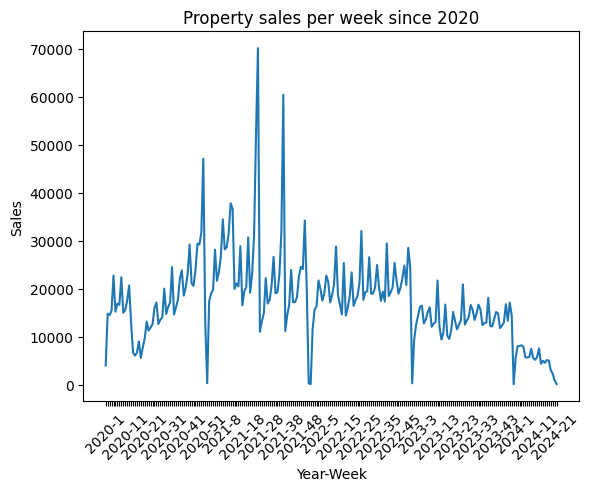

In [108]:
weeks_list = [_date.isocalendar().week for _date in DT["Date"].to_list()[0]]
DT[:, "week"] = dt.Frame(weeks_list)

DT_2020 = DT[f.year >= 2020, :]
sales_per_week = DT_2020[:, {'count_sales': count(f.id)}, by('year', 'week')]
sales_per_week[:, update(year_week = f.year + '-' + f.week)]
#display(sales_per_week)


sparse_labels = []
sales_labels = sales_per_week['year_week'].to_list()[0]
for index, item in enumerate(sales_labels):
    if index % 10 == 0:
        sparse_labels.append(item)
    else:
        sparse_labels.append('')

plt.plot(sales_per_week['count_sales'])
plt.xticks(range(0, len(sparse_labels)), sparse_labels, rotation=45)
plt.xlabel('Year-Week')
plt.ylabel('Sales')
plt.title('Property sales per week since 2020')
plt.show()

## 5.

Plot a histogram of sale prices and discuss which distribution best represents the data.

In [109]:
!pip install vaex

import vaex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.2/92.2 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.7/260.7 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 88.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 89.6 MB/s eta 0:00:0

In [110]:
import vaex


df = vaex.open(pp_file)

pp_cols = ['id', 'price', 'date', 'postcode', 'type', 'new', 'duration',
           'paon', 'saon', 'street', 'locality', 'town', 'county',
           'record_status']

old_names = df.get_column_names()
# display(old_names)
new_names = pp_cols
pp_names = dict(zip(old_names, new_names))

for old_name in pp_names:
  new_name = pp_names[old_name]
  df.rename(old_name, new_name)


display(df.info())

column,type,unit,description,expression
id,str,,,
price,int64,,,
date,datetime64[s],,,
postcode,str,,,
type,str,,,
new,str,,,
duration,str,,,
paon,str,,,
saon,str,,,
street,str,,,


None

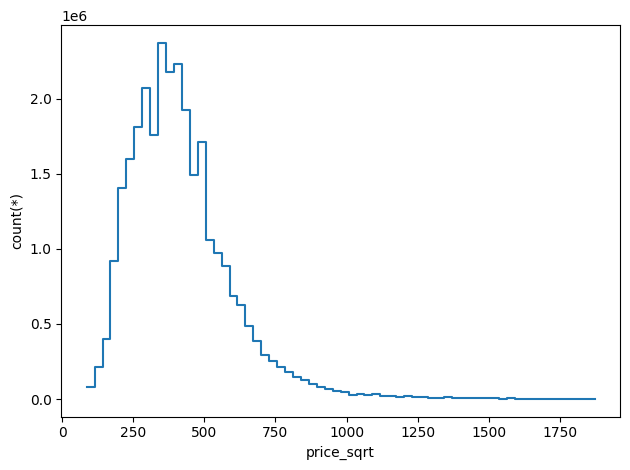

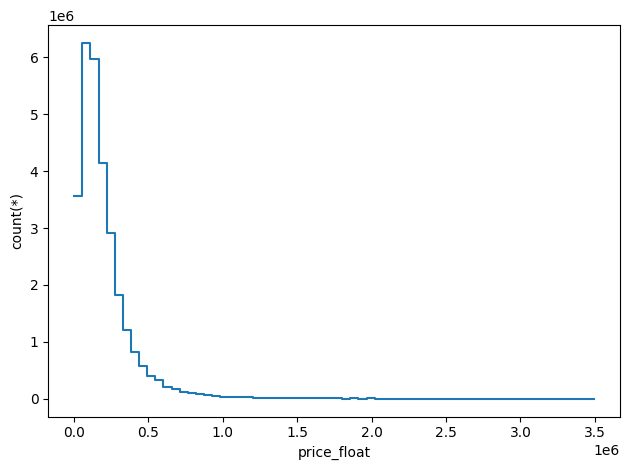

In [115]:
df['price_float'] = df.price.astype('float64')
df['price_sqrt'] = df.price_float ** 0.5

df.viz.histogram(df.price_sqrt, limits='99.7%')
plt.show()

df.viz.histogram(df.price_float, limits='99.7%')
plt.show()

## 6.

Using the BNG tiles and an appropriate scale, plot a map showing the number of sales per 10km grid square

In [216]:
# Download postcodes plus lat, long

# DEBUG - Delete me
# !rm -f NSPL_2021_MAY_2024.zip
# !rm -rf Data Documents User\ Guide

!wget 'https://www.arcgis.com/sharing/rest/content/items/f7464f3658ba439ba577651b32014cfe/data' -O 'NSPL_2021_MAY_2024.zip'
!unzip NSPL_2021_MAY_2024.zip
!awk -F',' '{print $3","$7","$8","$29","$30}' Data/NSPL21_MAY_2024_UK.csv | tr -d '"' > pcd_os_lat_long.csv
!ls -l pcd_os_lat_long.csv

--2024-07-23 00:51:44--  https://www.arcgis.com/sharing/rest/content/items/f7464f3658ba439ba577651b32014cfe/data
Resolving www.arcgis.com (www.arcgis.com)... 18.234.22.254, 34.233.149.104, 18.234.22.44
Connecting to www.arcgis.com (www.arcgis.com)|18.234.22.254|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ago-item-storage.s3.amazonaws.com/f7464f3658ba439ba577651b32014cfe/NSPL_2021_MAY_2024.zip?X-Amz-Security-Token=IQoJb3JpZ2luX2VjEKj%2F%2F%2F%2F%2F%2F%2F%2F%2F%2FwEaCXVzLWVhc3QtMSJGMEQCIC%2BYjzmohTWNndfG%2Fs4tUFB7rhjP4gtN%2B2ek8nLaIgFGAiB%2FWQyRwi5xzDH4o%2BUcpcH1RGjhdfmtjQOUIiLtUdgpUiq7BQiB%2F%2F%2F%2F%2F%2F%2F%2F%2F%2F8BEAAaDDYwNDc1ODEwMjY2NSIM%2B4sclg6yRVoYL1sOKo8F0%2B4jHtgT0RQXAlalBeSq1HOB2D0YUudaWcMvD04rlrFzwPm%2FFwfRb7n4yu9ikMhfcHKfrUTfU7imZw71b9eHzpvG9p7%2Fuc2HcyP%2FOERkU01t61Lchgq%2FU%2BZdI3brf5Cn%2F84a5Gezz0C5QBMEAmRMBrv9dCBnaHcONj%2FcLmkL8GNy9Dz%2BN22Y4utX9AYrLTu5nowcfZjVYnAbILZi1QlMf44TdYGSOZMOdQCuh5YnUQfB2fx0adqhLgwna1AK83cfY7x2lMk%2B

Load postcode, lat, long file and join to price paid data table.

In [217]:
from datatable import join


pcd = dt.fread('pcd_os_lat_long.csv')
pcd.names = ['postcode', 'oseast1m', 'osnrth1m', 'lat', 'long']
pcd.key = "postcode"

display(pcd)
print('\n')
display(pcd.stypes)

DT_ll = DT[:, :, join(pcd)]
print('\n')
display(DT_ll)

print('\nmissing:')
display(DT_ll['oseast1m'].to_pandas().isna().sum())
display(DT_ll['osnrth1m'].to_pandas().isna().sum())
display(DT_ll['lat'].to_pandas().isna().sum())
display(DT_ll['long'].to_pandas().isna().sum())

postcode,oseast1m,osnrth1m,lat,long
▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
AB1 0AA,385386,801193,57.1015,−2.24285
AB1 0AB,385177,801314,57.1026,−2.24631
AB1 0AD,385053,801092,57.1006,−2.24834
AB1 0AE,384600,799300,57.0844,−2.25571
AB1 0AF,384460,800660,57.0967,−2.2581
AB1 0AG,383890,800710,57.0971,−2.26751
AB1 0AJ,384779,800921,57.099,−2.25285
AB1 0AL,384669,801228,57.1018,−2.25469
AB1 0AN,385225,800757,57.0976,−2.24548


(stype.str32, stype.int32, stype.int32, stype.float64, stype.float64)

,id,price,date_str,postcode,type,new,duration,paon,saon,street,…,week,oseast1m,osnrth1m,lat,long
,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪,,▪▪▪▪,▪▪▪▪,▪▪▪▪,▪▪▪▪▪▪▪▪,▪▪▪▪▪▪▪▪
0,{109BBF80-1E51-4910-8E2C-B124E1117A7A},34950,1995-06-09 00:00,BA3 3AH,F,N,L,COOMBEND HOUSE,7,COOMBEND,…,23,368805,155097,51.2941,−2.44877
1,{D5233D67-2975-426B-B98D-B124E39331D9},133000,1995-06-19 00:00,SW18 5AG,T,N,F,142,,ASTONVILLE STREET,…,25,525309,172893,51.4412,−0.198423
2,{718BD35C-25E1-431C-8AF7-B124E63ED4E1},83000,1995-08-21 00:00,IP11 7PU,D,N,F,3,,GARFIELD ROAD,…,34,629789,234357,51.9602,1.34321
3,{E127F626-6247-4D95-A392-B124F4C0A558},59000,1995-07-27 00:00,PE21 0SF,D,Y,F,BEAUCADRE,,GAYSFIELD ROAD,…,30,536325,342200,52.9599,0.028082
4,{B10762A0-2C9C-4C82-A885-B1250B55FFF9},51000,1995-02-28 00:00,ME7 4DF,T,N,F,41,,FRANKLIN ROAD,…,9,577715,168262,51.3856,0.552598
5,{BBAB55E8-216F-4FFA-B9EC-B4AD71F833EB},37000,1995-06-02 00:00,TN1 2ET,F,N,L,48,TOP FLOOR FLAT,UPPER GROSVENOR ROAD,…,22,558611,140091,51.1381,0.265812
6,{FD34F0B9-8697-481D-A231-B4AD7716F2F5},55000,1995-05-12 00:00,ST19 5AP,D,N,F,GAS HOUSE,,PINFOLD LANE,…,19,392104,314238,52.7257,−2.11835
7,{657B1EA4-A147-4E1B-B70F-B4AD98A15237},47750,1995-12-12 00:00,LL18 5SZ,S,Y,F,18,,FFORDD TERFYN,…,50,298395,376168,53.2727,−3.52508
8,{FF6684D0-67EF-4FE1-AC8F-B4AD99ACE2CD},53000,1995-05-25 00:00,BS30 5XW,S,N,F,4,,GRASMERE GARDENS,…,21,367601,172844,51.4536,−2.46766



missing:


oseast1m    49184
dtype: int64

osnrth1m    49184
dtype: int64

lat    49184
dtype: int64

long    49184
dtype: int64

Download 10 Km grid squares.

In [140]:
!wget 'https://github.com/charlesroper/OSGB_Grids/blob/master/Shapefile/OSGB_Grid_10km.shp?raw=true' -O 'OSGB_Grid_10km.shp'
!ls -l OSGB_Grid_10km.shp

!wget 'https://github.com/charlesroper/OSGB_Grids/blob/master/Shapefile/OSGB_Grid_10km.shx?raw=true' -O 'OSGB_Grid_10km.shx'
!ls -l OSGB_Grid_10km.shx

--2024-07-22 21:36:42--  https://github.com/charlesroper/OSGB_Grids/blob/master/Shapefile/OSGB_Grid_10km.shp?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/charlesroper/OSGB_Grids/raw/master/Shapefile/OSGB_Grid_10km.shp [following]
--2024-07-22 21:36:42--  https://github.com/charlesroper/OSGB_Grids/raw/master/Shapefile/OSGB_Grid_10km.shp
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/charlesroper/OSGB_Grids/master/Shapefile/OSGB_Grid_10km.shp [following]
--2024-07-22 21:36:42--  https://raw.githubusercontent.com/charlesroper/OSGB_Grids/master/Shapefile/OSGB_Grid_10km.shp
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (ra

Load 10 Km grid squares.

,geometry
0,"POLYGON ((439999.999 1200000.003, 439999.999 1..."
1,"POLYGON ((449999.996 1200000.003, 449999.996 1..."
2,"POLYGON ((449999.996 1210000.000, 449999.996 1..."
3,"POLYGON ((460000.002 1200000.003, 460000.002 1..."
4,"POLYGON ((460000.002 1210000.000, 460000.002 1..."
...,...
2878,"POLYGON ((640000.001 169999.997, 640000.001 18..."
2879,"POLYGON ((540000.000 89999.997, 540000.000 100..."
2880,"POLYGON ((549999.997 89999.997, 549999.997 100..."
2881,"POLYGON ((560000.003 89999.997, 560000.003 100..."


<Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.01, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:751: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,geometry,sales
0,POINT (368805.000 155097.000),34950
1,POINT (525309.000 172893.000),133000
2,POINT (629789.000 234357.000),83000
3,POINT (536325.000 342200.000),59000
4,POINT (577715.000 168262.000),51000
...,...,...
99995,POINT (398789.000 302690.000),38000
99996,POINT (490876.000 220067.000),76000
99997,POINT (355626.000 362871.000),83000
99998,POINT (498696.000 148607.000),285000


<Axes: >

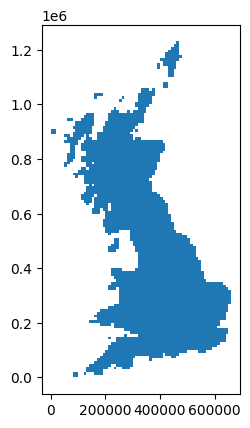

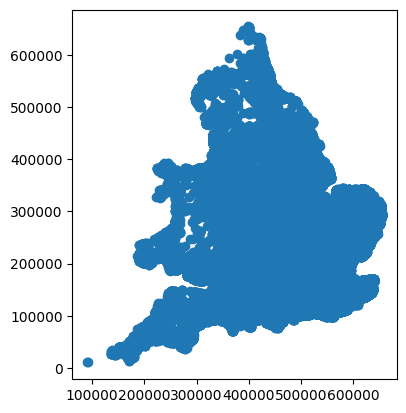

In [219]:
import geopandas as gpd


# Define the desired grid square size in kilometers
grid_size_km = 10

# Web Mercator projection for working with BNG tiles
# crs = {'init': 'epsg:3857'}
# crs = 'epsg:3857'
# crs = 'EPSG:4326'
crs = 'EPSG:27700'

# Load BNG tiles
bng_tiles = gpd.read_file('OSGB_Grid_10km.shp', crs=crs)
bng_tiles.set_crs(crs, inplace=True)
# bng_tiles.to_crs(crs, inplace=True)
display(bng_tiles)
display(bng_tiles.crs)
bng_tiles.plot()

# Assuming 'sales' data is a DataFrame with 'BNG' column representing point locations
# and a 'sales' column representing sales figures
sales_data = gpd.GeoDataFrame({'geometry': gpd.points_from_xy(DT_ll[:100000, 'oseast1m'].to_list()[0],
                                                              DT_ll[:100000,'osnrth1m'].to_list()[0]),
                               'sales': DT_ll[:100000, 'price'].to_list()[0]},
                               crs = crs,
                               #'sales': DT_ll['price']},
)
display(sales_data)
sales_data.plot()


In [221]:
from shapely.geometry import box


# Step 3: Create a 10km grid using BNG tiles
xmin, ymin, xmax, ymax = sales_data.total_bounds
grid_cells = []
cell_size = 10000  # 10km in meters

for x0 in np.arange(xmin, xmax + cell_size, cell_size):
    for y0 in np.arange(ymin, ymax + cell_size, cell_size):
        x1 = x0 + cell_size
        y1 = y0 + cell_size
        grid_cells.append(box(x0, y0, x1, y1))

grid = gpd.GeoDataFrame({'geometry': grid_cells}, crs=crs)
print('grid:')
display(grid)

# WARNING: Danger ...
# joined = gpd.sjoin(sales_data, grid, how='left', op='within')
# joined = gpd.sjoin(sales_data, grid, how='left', predicate='within')
# joined = gpd.sjoin(sales_data, grid, how='left', predicate='contains')
# joined

# Join sales data to the grid based on spatial intersection
# grid = grid.merge(sales_data.dissolve(by='geometry'), on='geometry', how='left')
# grid = grid.merge(sales_data.dissolve(), on='geometry', how='left')
#grid = grid.merge(sales_data, on='geometry', how='left')
#grid['sales_count'] = grid['sales'].count()
#grid['sales_count'].fillna(0, inplace=True)
#grid

bng_tiles.set_crs(crs, inplace=True)
print('bng_tiles:')
display(bng_tiles)
sales_count = gpd.sjoin(bng_tiles, sales_data, how="right", predicate="within")#.groupby("index_left").size()
print('sales_count:')
display(sales_count)

# Perform spatial join
# joined = gpd.sjoin(sales_data, bng_tiles, how='left', op='within')
# joined = gpd.sjoin(sales_data, bng_tiles, how='left', predicate=...)
# sales_count = gpd.sjoin(bng_tiles, sales_data, how="left", predicate="contains").groupby("index_left").size()
# sales_count = gpd.sjoin(bng_tiles.to_crs(), sales_data, how="left", predicate="contains") # .groupby("index_left").size()


grid:


,geometry
0,"POLYGON ((100143.000 10676.000, 100143.000 206..."
1,"POLYGON ((100143.000 20676.000, 100143.000 306..."
2,"POLYGON ((100143.000 30676.000, 100143.000 406..."
3,"POLYGON ((100143.000 40676.000, 100143.000 506..."
4,"POLYGON ((100143.000 50676.000, 100143.000 606..."
...,...
3823,"POLYGON ((670143.000 620676.000, 670143.000 63..."
3824,"POLYGON ((670143.000 630676.000, 670143.000 64..."
3825,"POLYGON ((670143.000 640676.000, 670143.000 65..."
3826,"POLYGON ((670143.000 650676.000, 670143.000 66..."


bng_tiles:


,geometry
0,"POLYGON ((439999.999 1200000.003, 439999.999 1..."
1,"POLYGON ((449999.996 1200000.003, 449999.996 1..."
2,"POLYGON ((449999.996 1210000.000, 449999.996 1..."
3,"POLYGON ((460000.002 1200000.003, 460000.002 1..."
4,"POLYGON ((460000.002 1210000.000, 460000.002 1..."
...,...
2878,"POLYGON ((640000.001 169999.997, 640000.001 18..."
2879,"POLYGON ((540000.000 89999.997, 540000.000 100..."
2880,"POLYGON ((549999.997 89999.997, 549999.997 100..."
2881,"POLYGON ((560000.003 89999.997, 560000.003 100..."


sales_count:


/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:751: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,index_left,geometry,sales
0,NaN,POINT (368805.000 155097.000),34950
1,NaN,POINT (525309.000 172893.000),133000
2,NaN,POINT (629789.000 234357.000),83000
3,NaN,POINT (536325.000 342200.000),59000
4,NaN,POINT (577715.000 168262.000),51000
...,...,...,...
99995,NaN,POINT (398789.000 302690.000),38000
99996,NaN,POINT (490876.000 220067.000),76000
99997,NaN,POINT (355626.000 362871.000),83000
99998,NaN,POINT (498696.000 148607.000),285000


sales_count:


,geometry,index_right,sales
0,"POLYGON ((439999.999 1200000.003, 439999.999 1...",NaN,NaN
1,"POLYGON ((449999.996 1200000.003, 449999.996 1...",NaN,NaN
2,"POLYGON ((449999.996 1210000.000, 449999.996 1...",NaN,NaN
3,"POLYGON ((460000.002 1200000.003, 460000.002 1...",NaN,NaN
4,"POLYGON ((460000.002 1210000.000, 460000.002 1...",NaN,NaN
...,...,...,...
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",6728.0,36000.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",67291.0,44000.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",80227.0,8000.0
2881,"POLYGON ((560000.003 89999.997, 560000.003 100...",35806.0,118000.0


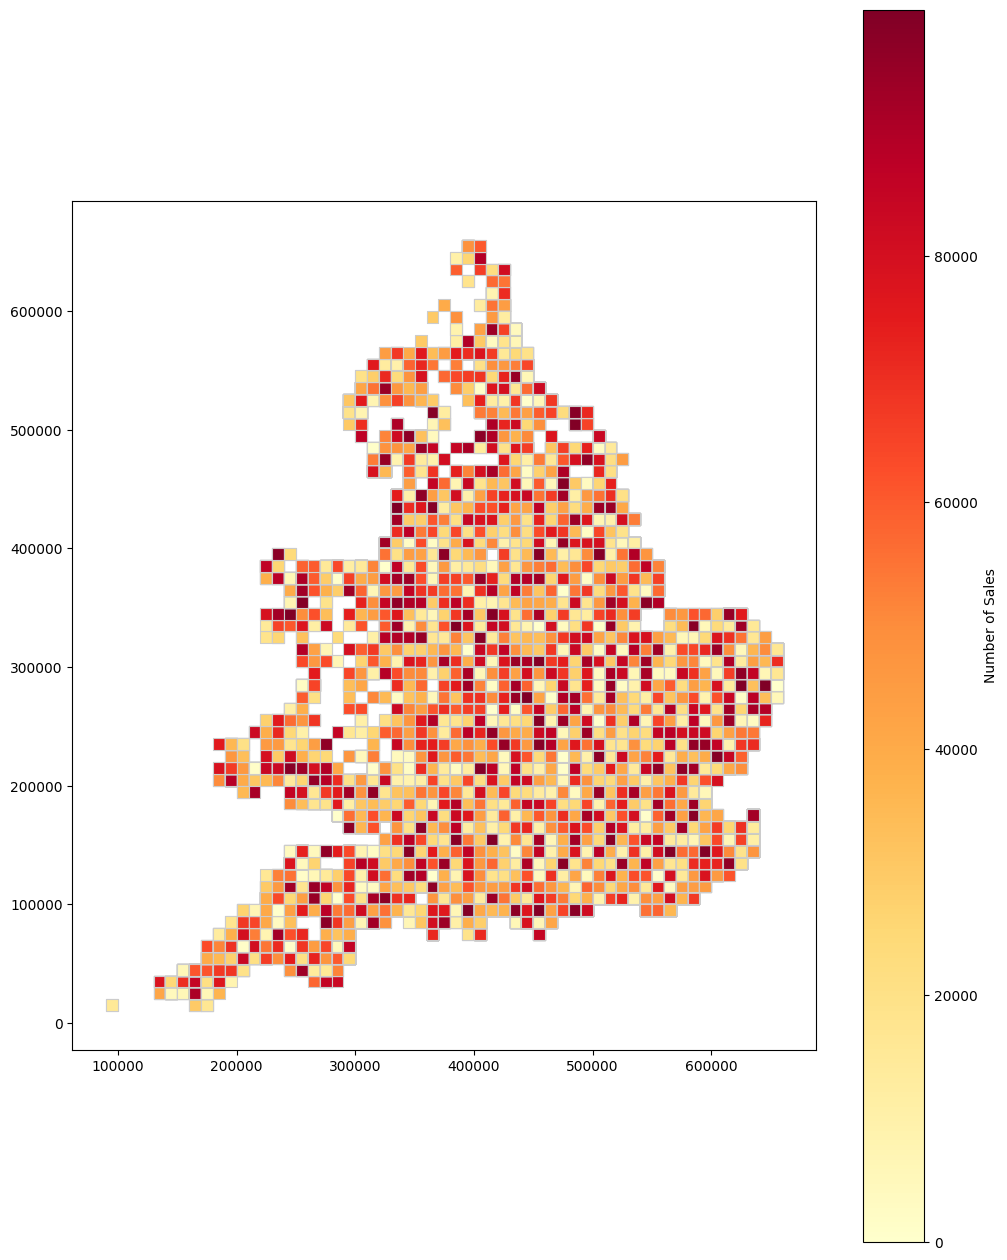

In [231]:
# sales_count = gpd.sjoin(bng_tiles, sales_data, how="right", predicate="within")#.groupby("index_left").size()
sales_count = gpd.sjoin(bng_tiles, sales_data, how="left", predicate="contains")#.groupby("index_right").size()
print('sales_count:')
display(sales_count)

# Step 5: Plot the map
fig, ax = plt.subplots(figsize=(12, 16))
sales_count.plot(column='index_right', cmap='YlOrRd', linewidth=0.8, edgecolor='0.8',
          ax=ax, legend=True, legend_kwds={'label': 'Number of Sales'})
plt.show()

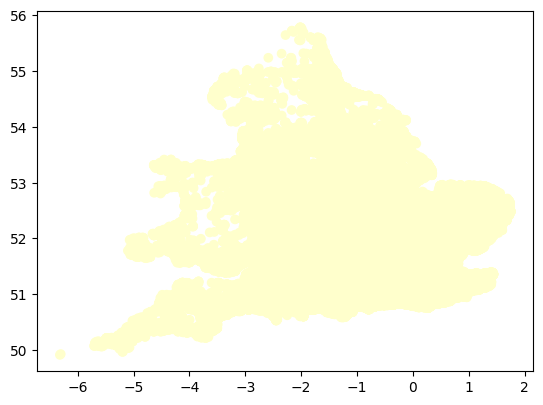

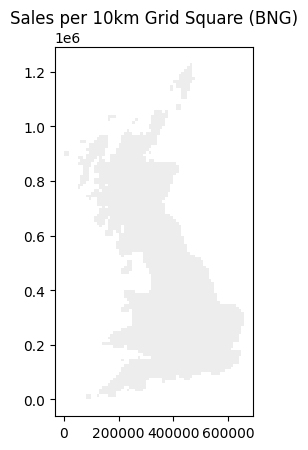

In [181]:
# Calculate the sum of sales within each grid square
joined['sales_count'] = joined['sales'].count()
joined['sales_count'].fillna(0, inplace=True)

# Project the grid back to BNG for plotting (if necessary)
joined = joined.to_crs(crs)

# Plot the grid with colors representing sales count per square
joined.plot(column='sales_count', cmap='YlOrRd')  # slow :-(
bng_tiles.plot(alpha=0.4, facecolor='lightgray')
plt.title('Sales per 10km Grid Square (BNG)')
plt.show()

In [182]:
joined

/usr/local/lib/python3.10/dist-packages/geopandas/geoseries.py:751: UserWarning: GeoSeries.notna() previously returned False for both missing (None) and empty geometries. Now, it only returns False for missing values. Since the calling GeoSeries contains empty geometries, the result has changed compared to previous versions of GeoPandas.
Given a GeoSeries 's', you can use '~s.is_empty & s.notna()' to get back the old behaviour.

To further ignore this warning, you can do: 
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.notna', UserWarning)
  return self.notna()


,geometry,sales,index_right,sales_count
0,POINT (-2.449 51.294),34950,0.0,100000
1,POINT (-0.198 51.441),133000,0.0,100000
2,POINT (1.343 51.960),83000,0.0,100000
3,POINT (0.028 52.960),59000,0.0,100000
4,POINT (0.553 51.386),51000,0.0,100000
...,...,...,...,...
99995,POINT (-2.019 52.622),38000,0.0,100000
99996,POINT (-0.681 51.872),76000,0.0,100000
99997,POINT (-2.665 53.161),83000,0.0,100000
99998,POINT (-0.588 51.228),285000,0.0,100000


In [178]:
import gc


gc.collect()
gc.collect()

0

## 7.

Plot a map showing the average sale price per 10km grid square.

...